# Umployment Rate Study Through Plots

**In this notebook we gonna see various info about the Unemployment dataset through plots in python. I'll hide the code to make this notebook as a kind of report.**

# Loading Libraies and Dataset

In [80]:
try:
    import pandas as pd
except ImportError:
    print("Error: Could not import the pandas library.")
else:
    try:
        unemployment_data=pd.read_csv("/kaggle/input/unemployment-in-america-per-us-state/Unemployment in America Per US State.csv")
    except pd.errors.ParserError:
        print("Error: Could not parse the CSV file.")
    else:
        try:
            from pylab import rcParams
            rcParams['figure.figsize'] = 18, 8
        except PlotSetError:
            print("Coudn't set default plot size")
        else:
            print("Imported necessary libraries and loaded data successfully.")
        


Imported necessary libraries and loaded data successfully.


# Overviewing data

In [81]:
unemployment_data.head(10)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
5,37,Los Angeles County,1976,1,"5,273,000","3,381,856",64.1,"3,081,806",58.4,"300,050",8.9
6,8,Colorado,1976,1,"1,832,000","1,230,966",67.2,"1,160,104",63.3,"70,862",5.8
7,9,Connecticut,1976,1,"2,248,000","1,442,847",64.2,"1,301,974",57.9,"140,873",9.8
8,10,Delaware,1976,1,"417,000","261,418",62.7,"240,543",57.7,"20,875",8.0
9,11,District of Columbia,1976,1,"520,000","334,691",64.4,"305,677",58.8,"29,014",8.7


> Data Structure

In [82]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FIPS Code                                                  29892 non-null  int64  
 1   State/Area                                                 29892 non-null  object 
 2   Year                                                       29892 non-null  int64  
 3   Month                                                      29892 non-null  int64  
 4   Total Civilian Non-Institutional Population in State/Area  29892 non-null  object 
 5   Total Civilian Labor Force in State/Area                   29892 non-null  object 
 6   Percent (%) of State/Area's Population                     29892 non-null  float64
 7   Total Employment in State/Area                             29892 non-null  object 
 8   Percen

> Null Value Check

In [83]:
unemployment_data.isna().sum()

FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64

> Descriptive Statistics

In [84]:
unemployment_data.describe()

,FIPS Code,Year,Month,Percent (%) of State/Area's Population,Percent (%) of Labor Force Employed in State/Area,Percent (%) of Labor Force Unemployed in State/Area
count,29892.000000,29892.000000,29892.00000,29892.000000,29892.000000,29892.000000
mean,990.830189,1999.000000,6.50000,65.516202,61.670417,5.920788
std,6935.157218,13.564887,3.45211,4.304355,4.739074,2.207521
min,1.000000,1976.000000,1.00000,51.000000,41.600000,1.900000
25%,17.000000,1987.000000,3.75000,62.800000,58.600000,4.300000
50%,30.000000,1999.000000,6.50000,65.900000,61.800000,5.500000
75%,42.000000,2011.000000,9.25000,68.500000,65.100000,7.100000
max,51000.000000,2022.000000,12.00000,75.700000,73.100000,30.600000


# Feature Engineering

In [85]:
# Convert the year and month columns to datetime format
unemployment_data['Month'] = pd.to_datetime(unemployment_data['Month'].astype(str), format='%m').dt.month

In [86]:
# Coverting object to numeric datatype
numeric_cols = ['Total Civilian Non-Institutional Population in State/Area',
                'Total Civilian Labor Force in State/Area',
                'Total Employment in State/Area',
                'Total Unemployment in State/Area']
    
for col in numeric_cols:
    unemployment_data[col] = pd.to_numeric(unemployment_data[col].str.replace(',', ''))

In [87]:
# Convert 'Year' and 'Month' columns to a datetime format:
unemployment_data['Year_Month'] = pd.to_datetime(unemployment_data[['Year', 'Month']].assign(DAY=1))

In [89]:
# Calculate the unemployment rate:
unemployment_data_monthly['Unemployment Rate'] = unemployment_data_monthly['Total Unemployment in State/Area'] / unemployment_data_monthly['Total Civilian Labor Force in State/Area'] * 100

# EDA Through Plots

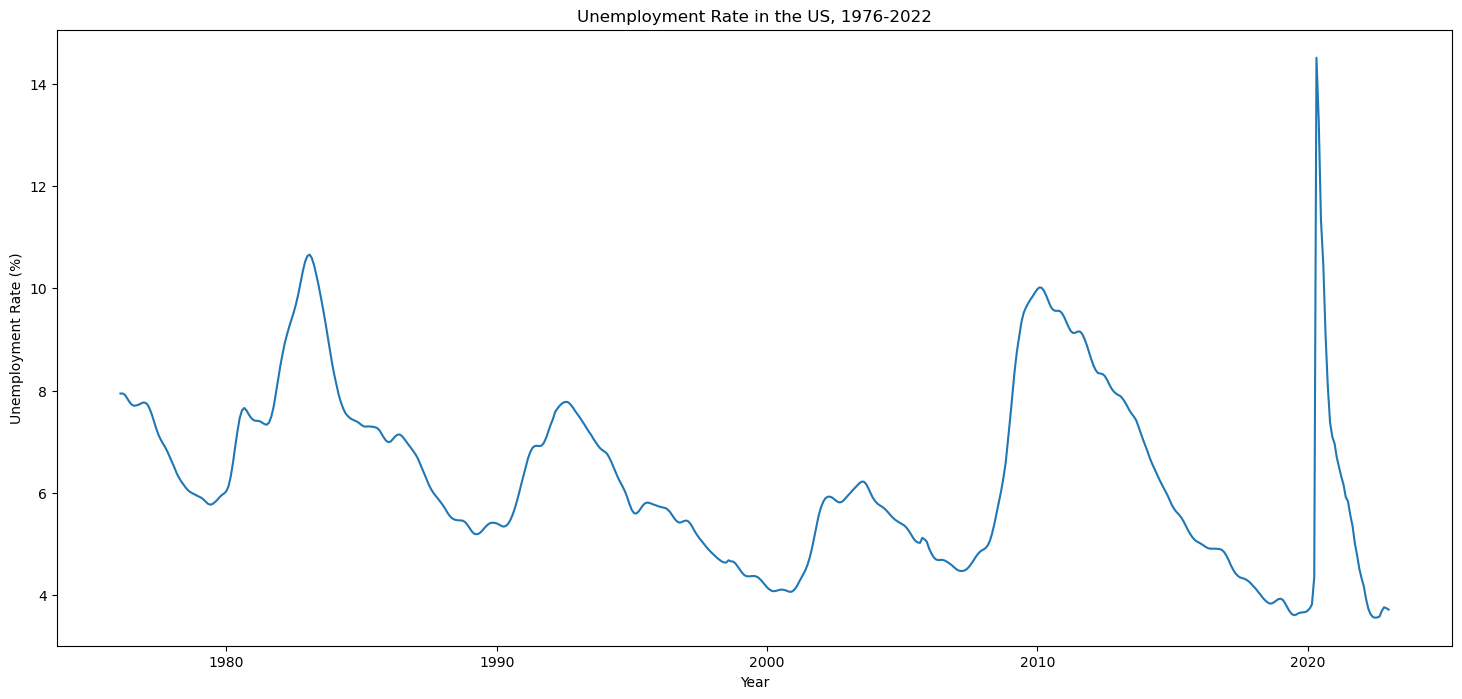

In [90]:
import matplotlib.pyplot as plt

plt.plot(unemployment_data_monthly.index, unemployment_data_monthly['Unemployment Rate'])
plt.title('Unemployment Rate in the US, 1976-2022')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


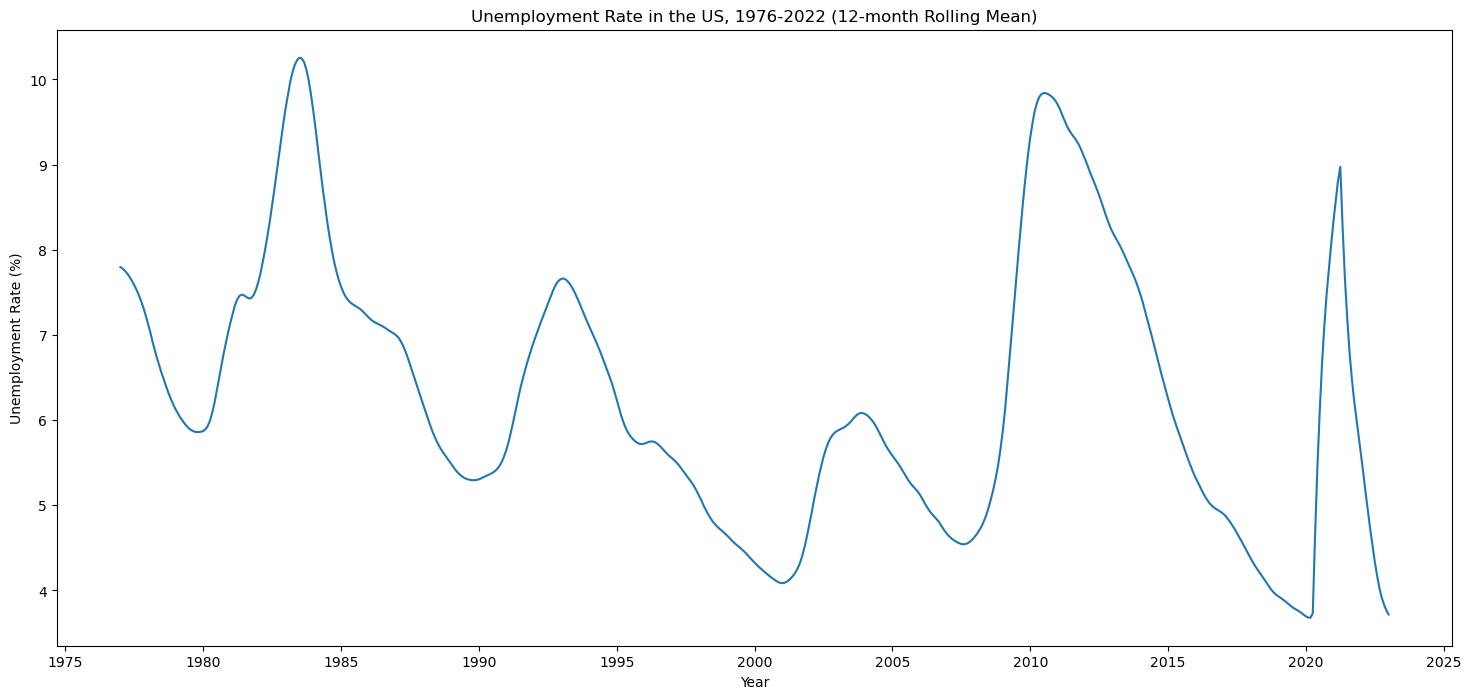

In [91]:
unemployment_data_monthly['Unemployment Rate (Rolling Mean)'] = unemployment_data_monthly['Unemployment Rate'].rolling(window=12).mean()


plt.plot(unemployment_data_monthly.index, unemployment_data_monthly['Unemployment Rate (Rolling Mean)'])
plt.title('Unemployment Rate in the US, 1976-2022 (12-month Rolling Mean)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


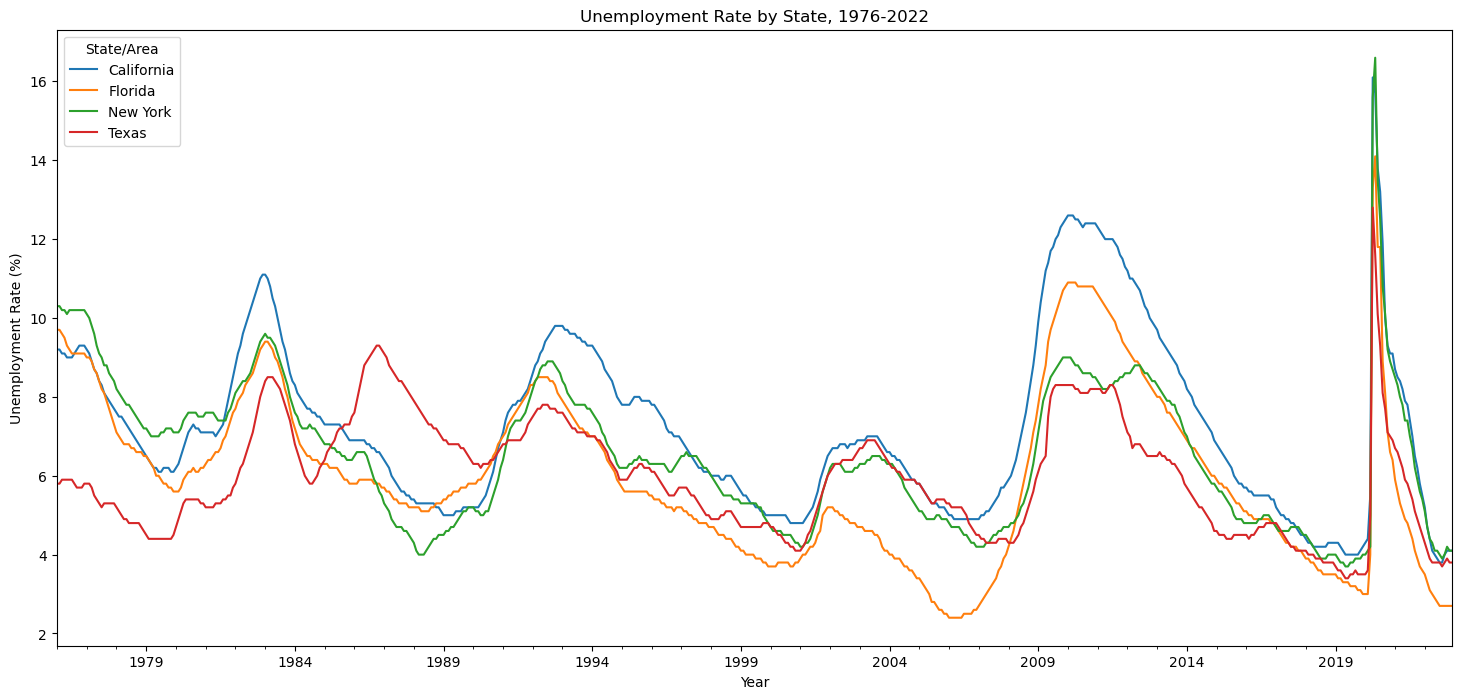

In [92]:
unemployment_data=unemployment_data.reset_index()

state_list = ['California', 'Texas', 'New York', 'Florida']
df_states = unemployment_data[unemployment_data['State/Area'].isin(state_list)]
df_states_pivot = df_states.pivot(index='Year_Month', columns='State/Area', values='Percent (%) of Labor Force Unemployed in State/Area')

df_states_pivot.plot()
plt.title('Unemployment Rate by State, 1976-2022')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


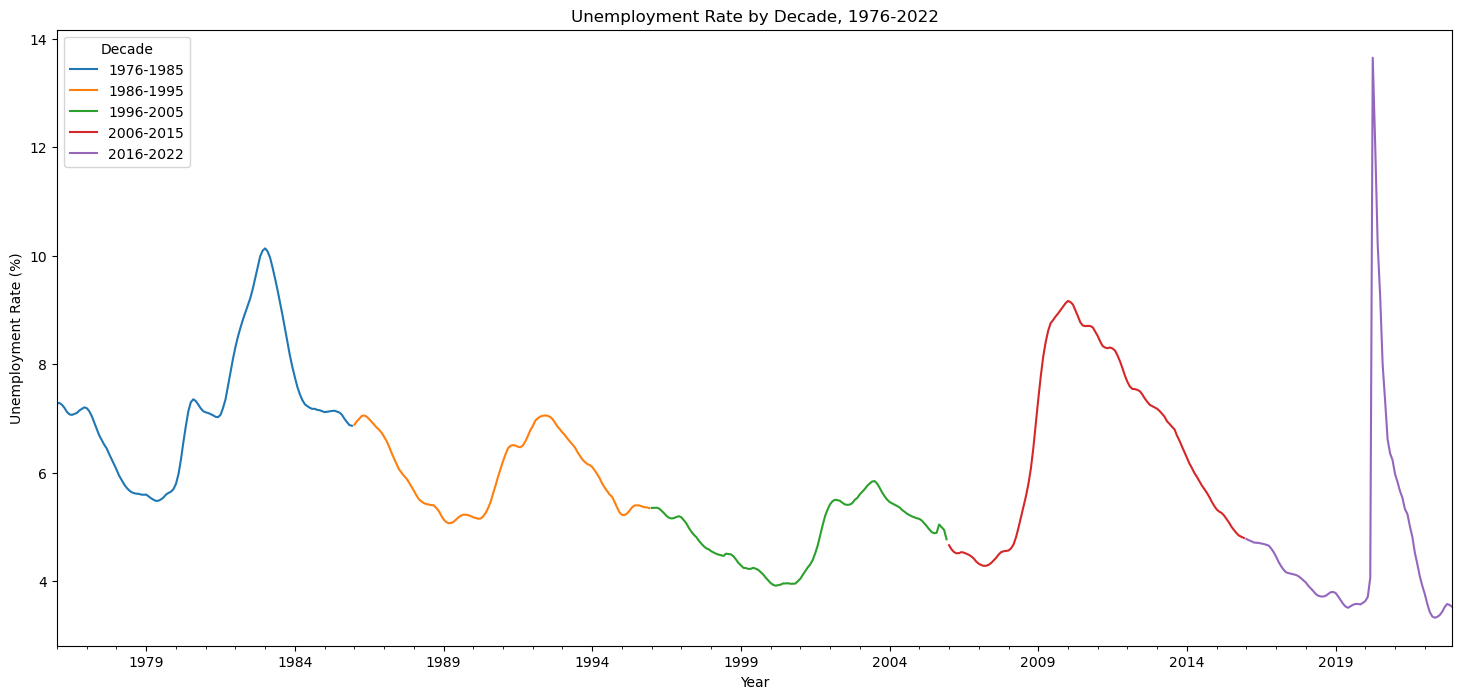

In [93]:
df_decade = unemployment_data.copy()
df_decade['Decade'] = pd.cut(df_decade['Year'], bins=[1975, 1985, 1995, 2005, 2015, 2025], labels=['1976-1985', '1986-1995', '1996-2005', '2006-2015', '2016-2022'])
df_decade_pivot = df_decade.pivot_table(values='Percent (%) of Labor Force Unemployed in State/Area', index='Year_Month', columns='Decade')

df_decade_pivot.plot()
plt.title('Unemployment Rate by Decade, 1976-2022')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


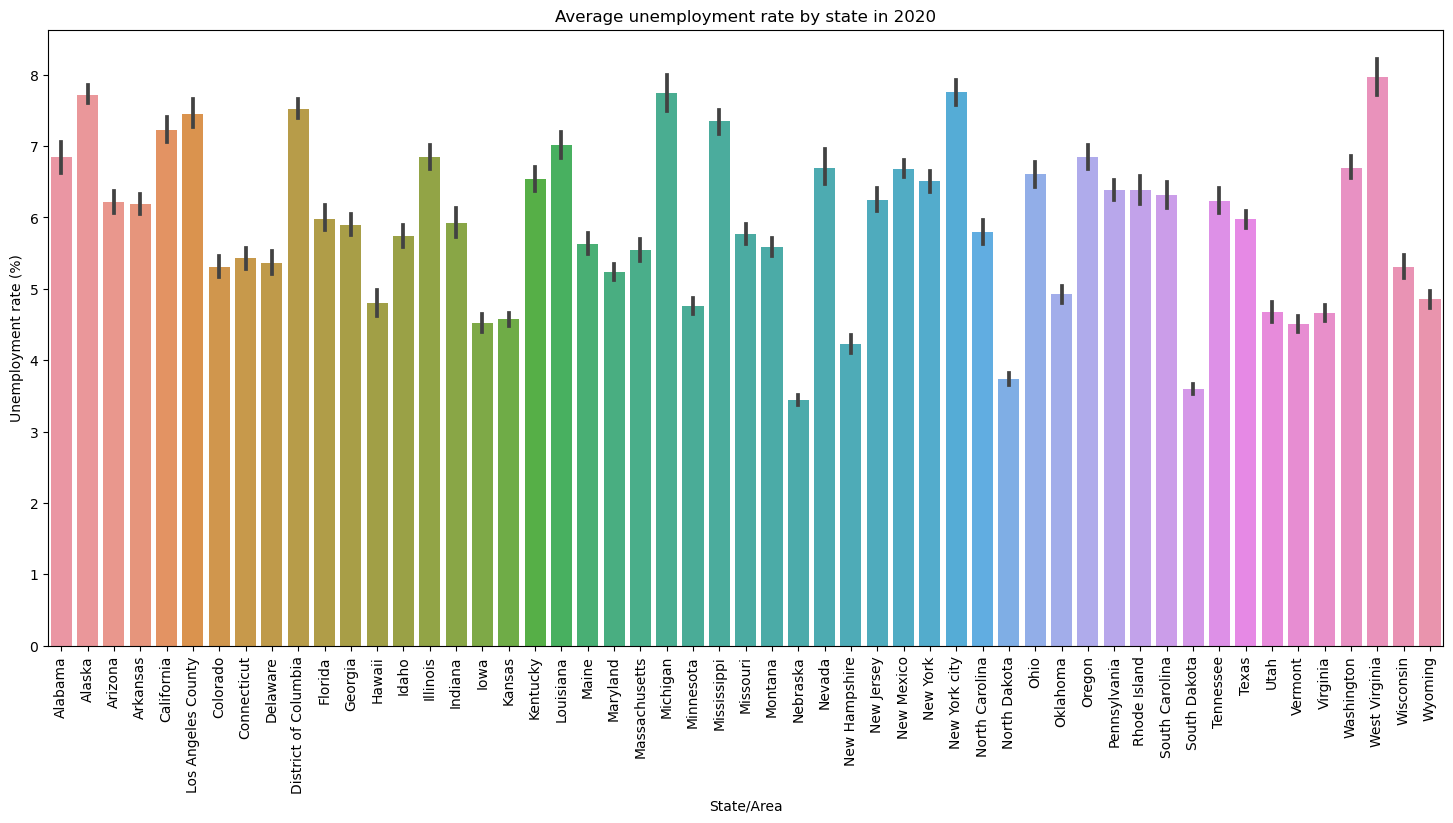

In [94]:
# Cross-sectional analysis
# Plot a bar chart of the average unemployment rates for each state in a specific year
year = 2020
year_data = unemployment_data[unemployment_data['Year'] == year]
sns.barplot(x='State/Area', y='Percent (%) of Labor Force Unemployed in State/Area', data=unemployment_data)
plt.xticks(rotation=90)
plt.title(f"Average unemployment rate by state in {year}")
plt.ylabel('Unemployment rate (%)')
plt.show()

# Closing Notes

***Below is a summarising interative plot which one can hover and see the actual unemployemt rate at any period.***

In [77]:
fig = px.line(unemployment_data_monthly, x=unemployment_data_monthly.index, y='Unemployment Rate',
              title='Unemployment Rate in the US, 1976-2022', labels={'x': 'Year', 'y': 'Unemployment Rate (%)'})
fig.show()

***If You can closely observe then those peaks in the unemployment rate are always caused by some big events like COVID. Also if you know Economics this high unemployment peaks would also contribute high inflation which still holds true after the major events of COVID and Russia Ukraine war we have our inflation at peak***

**Hope This short visulalisation would have been helpful. Upvote if you liked it**

# The End